In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Ellipse')

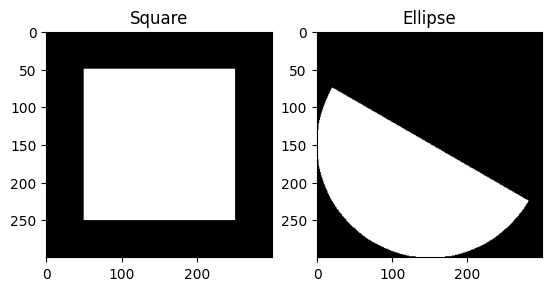

In [4]:
square = np.zeros((300,300), 'uint8')
cv2.rectangle(square, (50, 50), (250, 250), 255, -1)

ellipse = np.zeros((300,300), 'uint8')
cv2.ellipse(ellipse, (150, 150), (150, 150), 30, 0, 180, 255, -1)

plt.subplot(121);plt.imshow(square, cmap='gray');plt.title("Square")
plt.subplot(122);plt.imshow(ellipse, cmap='gray');plt.title("Ellipse")

Text(0.5, 1.0, 'Not square')

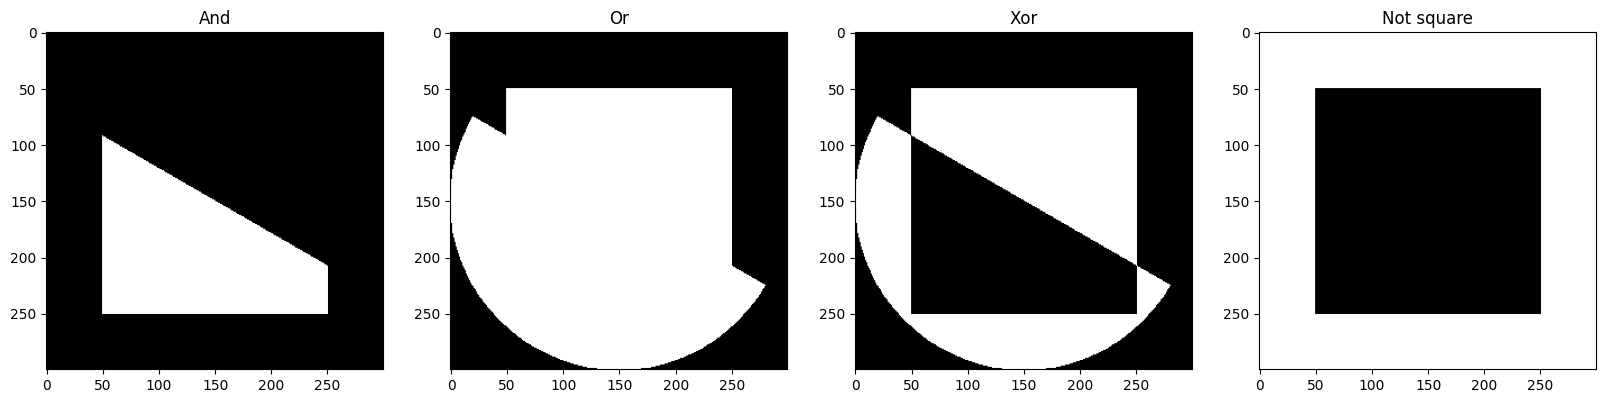

In [5]:
bitwise_and = cv2.bitwise_and(square, ellipse)
bitwise_or = cv2.bitwise_or(square, ellipse)
bitwise_xor = cv2.bitwise_xor(square, ellipse)
bitwise_not_sq = cv2.bitwise_not(square)

plt.figure(figsize=(20,5))
plt.subplot(141);plt.imshow(bitwise_and, cmap="gray");plt.title("And")
plt.subplot(142);plt.imshow(bitwise_or, cmap="gray");plt.title("Or")
plt.subplot(143);plt.imshow(bitwise_xor, cmap="gray");plt.title("Xor")
plt.subplot(144);plt.imshow(bitwise_not_sq, cmap="gray");plt.title("Not square")

(300, 300, 3)
(300, 300, 3)


Text(0.5, 1.0, 'Xor')

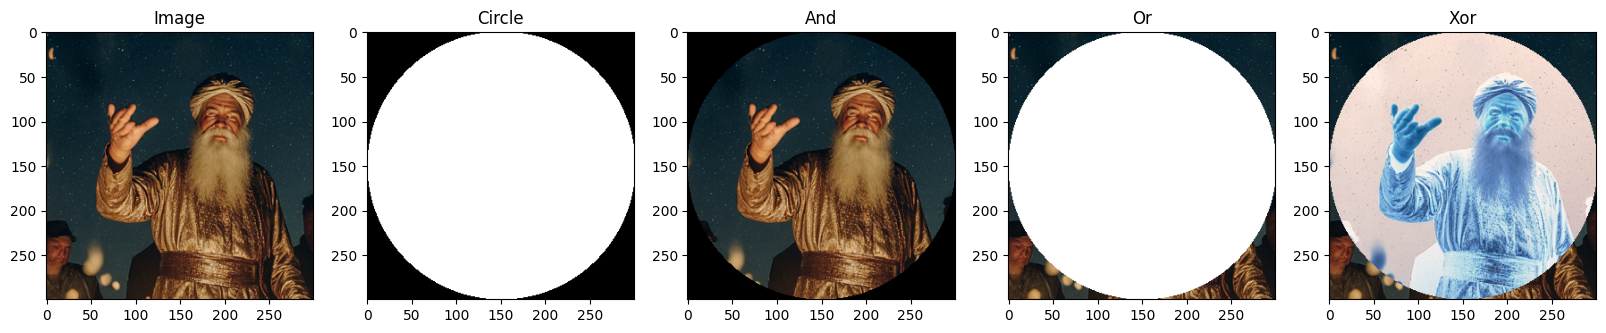

In [7]:
box_size = 300
x,y = 500, 100
plt.figure(figsize=(20, 5))

img = cv2.imread("../../images/1.png")
cropped = img[y:y+box_size, x:x+box_size]

plt.subplot(151);plt.imshow(cropped[...,::-1]);plt.title("Image")
print(cropped.shape)

circle = np.zeros(cropped.shape, 'uint8')
cv2.circle(circle, (box_size//2, box_size//2), box_size//2, (255,255,255), -1)

plt.subplot(152);plt.imshow(circle, cmap="gray");plt.title("Circle")
print(circle.shape)

output_img = cv2.bitwise_and(cropped, circle)
plt.subplot(153);plt.imshow(output_img[...,::-1]);plt.title("And")

output_img = cv2.bitwise_or(cropped, circle)
plt.subplot(154);plt.imshow(output_img[...,::-1]);plt.title("Or")

output_img = cv2.bitwise_xor(cropped, circle)
plt.subplot(155);plt.imshow(output_img[...,::-1]);plt.title("Xor")

## Convert JPG to PNG

### My method

In [43]:
img = cv2.imread("../../images/1.png", cv2.IMREAD_UNCHANGED)
png_img = np.zeros((*img.shape[:2], 4))
png_img[...,3] = 255
png_img[...,:3] = img
print(png_img.shape)
cv2.imwrite("../../output.png", png_img)

(768, 1376, 4)


True

### Second method

In [46]:
img = cv2.imread("../../images/1.png", cv2.IMREAD_UNCHANGED)
b, g, r = cv2.split(img)
png_img = cv2.merge((b, g, r, np.full(b.shape, 255, 'uint8')))
print(png_img.shape)
cv2.imwrite("../../output.png", png_img)

(768, 1376, 4)


True

## Mask image with a circle

In [59]:
box_size = 300
x, y = 500, 100

png_img = np.zeros((box_size,box_size,4), np.uint8)

img = cv2.imread("../../images/1.png", cv2.IMREAD_UNCHANGED)
cropped = img[y:y+box_size, x:x+box_size]
png_img[..., 0:3] = cropped

circle = np.zeros(png_img.shape[:2], 'uint8')
cv2.circle(circle, (box_size//2, box_size//2), box_size//2, (255, 255, 255), -1)

png_img[...,3] = circle
cv2.imwrite("../../output.png", png_img)

True